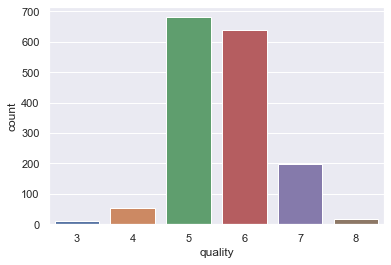

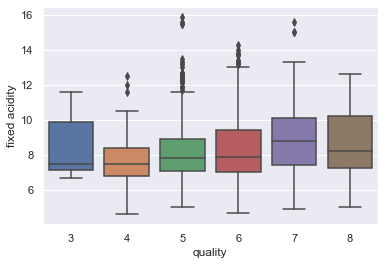

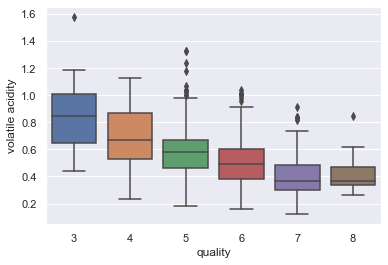

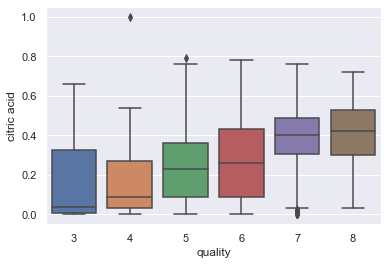

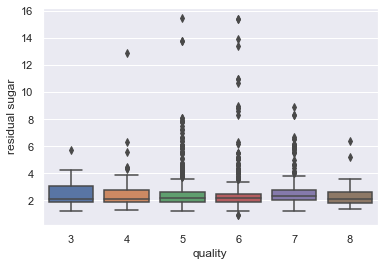

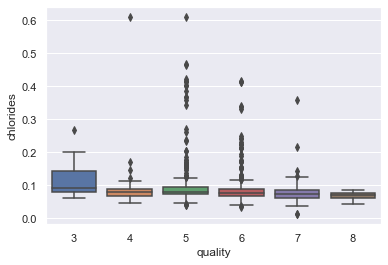

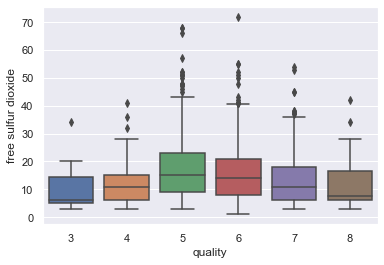

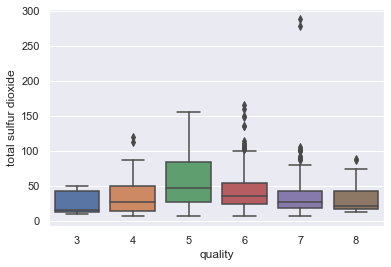

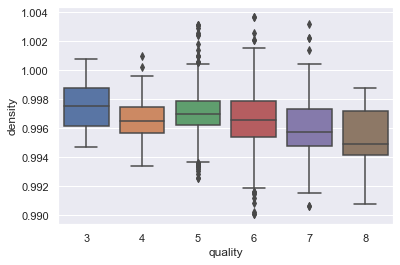

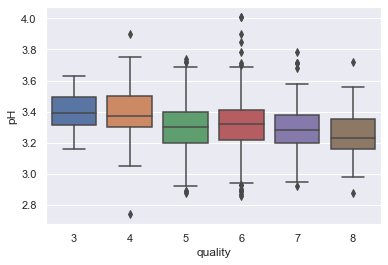

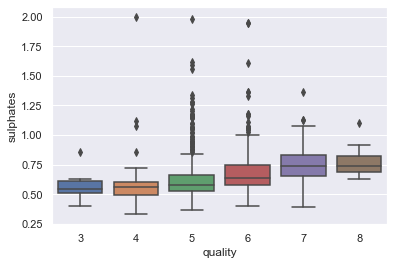

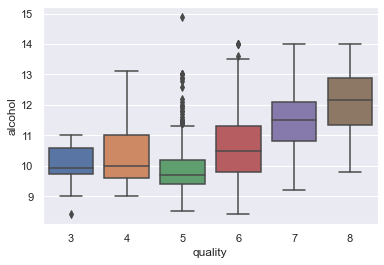

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

red_wines = pd.read_csv('winequality-red.csv')
red_wines.head()


X = red_wines.iloc[:, :-1]
Y = red_wines.iloc[:, -1:]

# Balans danych
sns.countplot(x='quality', data=red_wines)
plt.show()

# Analiza danych odstających
for column in X:
    sns.boxplot(x='quality', y=column, data=red_wines)
    plt.show()


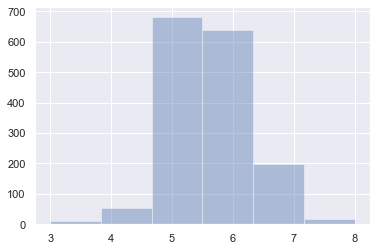

In [6]:
# Histogram danych nierównoważonych
sns.set(color_codes=True)
sns.distplot(Y, kde=False, bins=6)

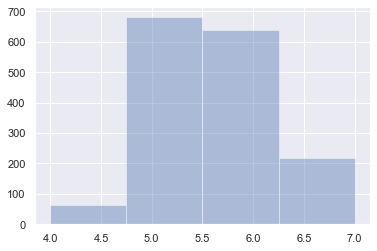

In [7]:
# łączenie klas
red_wines = red_wines.replace(8, 7)
red_wines = red_wines.replace(3, 4)

X = red_wines.iloc[:, :-1]
Y = red_wines.iloc[:, -1:]

sns.set(color_codes=True)
sns.distplot(Y, kde=False, bins=4)

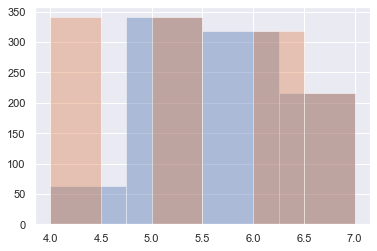

In [8]:
# usunięcie nadmiaru danych
red_wines = red_wines.drop(red_wines.query('quality == 5').sample(frac=.5).index)
red_wines = red_wines.drop(red_wines.query('quality == 6').sample(frac=.5).index)
X = red_wines.iloc[:, :-1]
Y = red_wines.iloc[:, -1:]

sns.set(color_codes=True)
sns.distplot(Y, kde=False, bins=4)

# duplikacja danych
from imblearn.over_sampling import SMOTE
smote = SMOTE("minority")
X, Y = smote.fit_sample(X, Y)
sns.distplot(Y, kde=False, bins=6)

frames = [X, Y]
red_wines = pd.concat(frames)
red_wines.to_csv("red_wines_after_over_sampling")